In [2]:
# import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np#
import seaborn as sns
from shapely.geometry import LineString
from matplotlib.lines import Line2D

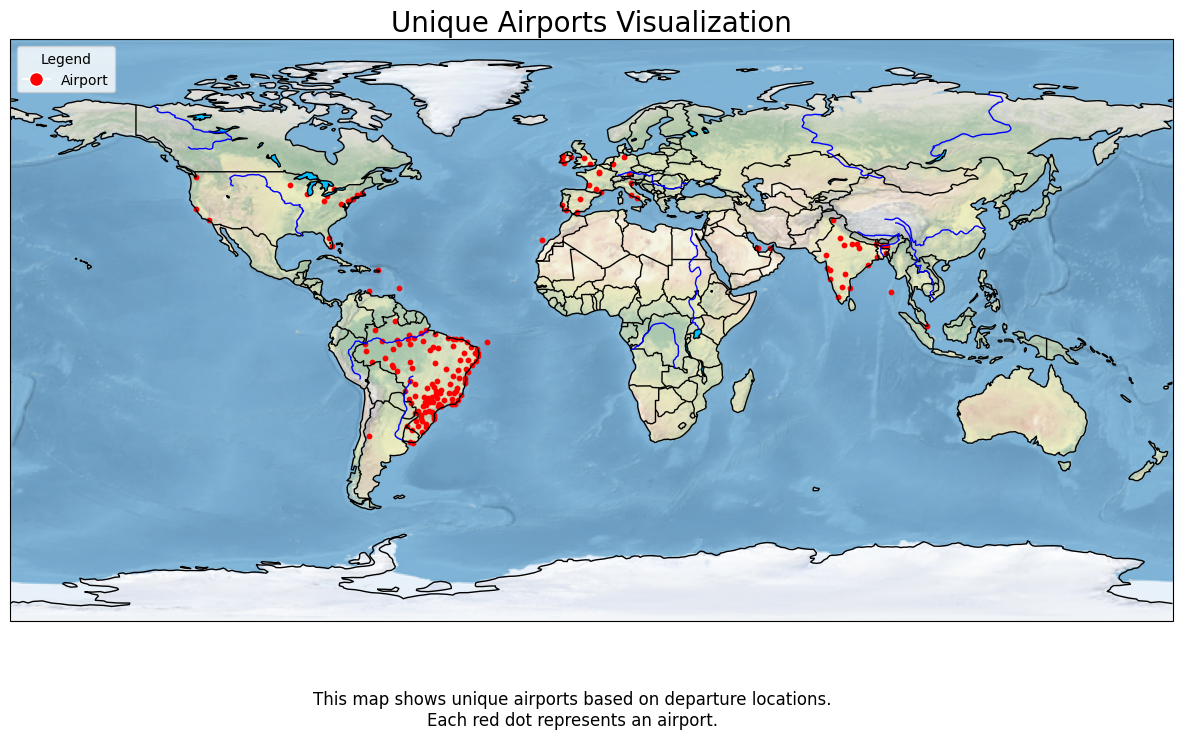

In [23]:
# read data from the Parquet file
data = pd.read_parquet('../data/data_parquet/processed_data_combined.parquet')

# extract unique airports
unique_airports = data[['departure_city', 'departure_country', 'departure_lat', 'departure_lon']].drop_duplicates()

# create a GeoDataFrame
gdf = gpd.GeoDataFrame(unique_airports, 
                       geometry=gpd.points_from_xy(unique_airports.departure_lon, unique_airports.departure_lat))

# filter out empty points
gdf = gdf[~gdf.geometry.is_empty]

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add water bodies and land masses
ax.stock_img()  # use standard background image
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='coral')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='skyblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='deepskyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# add airports (only points, no labels)
ax.scatter(gdf.geometry.x, gdf.geometry.y, color='red', s=10, transform=ccrs.PlateCarree())

# add title and description
plt.title('Unique Airports Visualization', fontsize=20)
plt.figtext(0.5, 0.1, 'This map shows unique airports based on departure locations.\n'
                      'Each red dot represents an airport.', 
            ha='center', fontsize=12)

# add legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

plt.show()


In [24]:
# count the number of flights departing from each airport
departure_flight_counts = data.groupby(['departure_airport', 'departure_city', 'departure_country', 'departure_lat', 'departure_lon']).flight_id.nunique().reset_index()
departure_flight_counts.columns = ['departure_airport', 'departure_city', 'departure_country', 'departure_lat', 'departure_lon', 'num_flights']

# display the table
departure_flight_counts

departure_airport        departure_city departure_country  departure_lat  \
0                 AAX                 Araxa                BR      -19.56320   
1                 AFL         Alta Floresta                BR       -9.86639   
2                 AGP                Malaga                ES       36.67490   
3                 AJU               Aracaju                BR      -10.98400   
4                 AMD             Ahmedabad                IN       23.07720   
..                ...                   ...               ...            ...   
173               VDC  Vitória da Conquista                BR      -14.90783   
174               VIX               Vitoria                BR      -20.25806   
175               VNS              Varanasi                IN       25.45117   
176               XAP               Chapeco                BR      -27.13420   
177               YYZ           Mississauga                CA       43.67720   

     departure_lon  num_flights  
0        -46.96040           10  
1        -56.10500           12  
2         -4.49911           18  
3        -37.07030          100  
4         72.63470          220  
..             ...          ...  
173      -40.91467           23  
174      -40.28639          167  
175       82.85867           81  
176      -52.65660           52  
177      -79.63060           19  

[178 rows x 6 columns]

In [25]:
# count the number of flights arriving at each airport
arrival_flight_counts = data.groupby(['arrival_airport', 'arrival_city', 'arrival_country', 'arrival_lat', 'arrival_lon']).flight_id.nunique().reset_index()
arrival_flight_counts.columns = ['arrival_airport', 'arrival_city', 'arrival_country', 'arrival_lat', 'arrival_lon', 'num_flights']
arrival_flight_counts

arrival_airport      arrival_city arrival_country  arrival_lat  \
0               AAX             Araxa              BR    -19.56320   
1               ACE  Lanzarote Island              ES     28.94550   
2               ADB             Izmir              TR     38.29240   
3               AFL     Alta Floresta              BR     -9.86639   
4               AGP            Malaga              ES     36.67490   
..              ...               ...             ...          ...   
188             VNS          Varanasi              IN     25.45117   
189             VRN            Verona              IT     45.39570   
190             XAP           Chapeco              BR    -27.13420   
191             YYZ       Mississauga              CA     43.67720   
192             ZRH            Zurich              CH     47.46470   

     arrival_lon  num_flights  
0      -46.96040            5  
1      -13.60520           30  
2       27.15700           10  
3      -56.10500           13  
4       -4.49911           63  
..           ...          ...  
188     82.85867           81  
189     10.88850            8  
190    -52.65660           51  
191    -79.63060           18  
192      8.54917           22  

[193 rows x 6 columns]

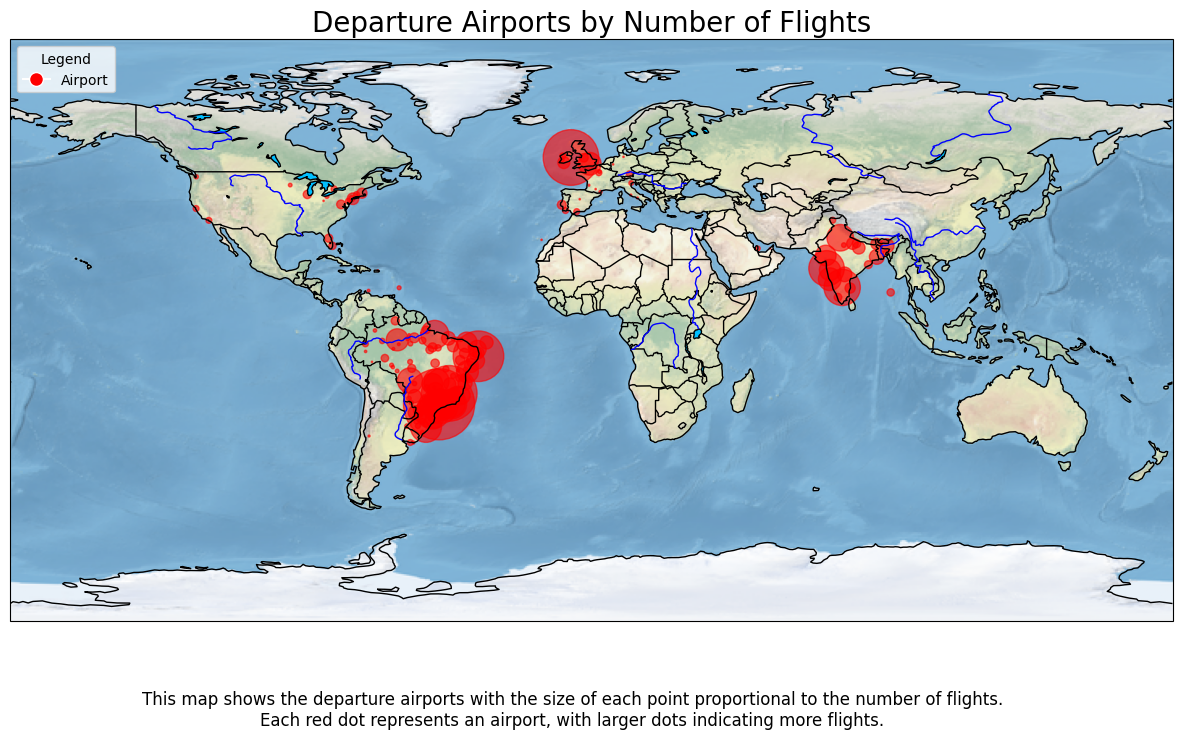

In [26]:
# create a GeoDataFrame
gdf = gpd.GeoDataFrame(flight_counts, 
                       geometry=gpd.points_from_xy(flight_counts.departure_lon, flight_counts.departure_lat))

# filter out empty points
gdf = gdf[~gdf.geometry.is_empty]

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add water bodies and land masses
ax.stock_img()  # use standard background image
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='coral')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='skyblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='deepskyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# add airports with size proportional to the number of flights
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, s=gdf.num_flights, color='red', transform=ccrs.PlateCarree(), alpha=0.6)

# add title and description
plt.title('Departure Airports by Number of Flights', fontsize=20)
plt.figtext(0.5, 0.1, 'This map shows the departure airports with the size of each point proportional to the number of flights.\n'
                      'Each red dot represents an airport, with larger dots indicating more flights.', 
            ha='center', fontsize=12)

# add legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

plt.show()


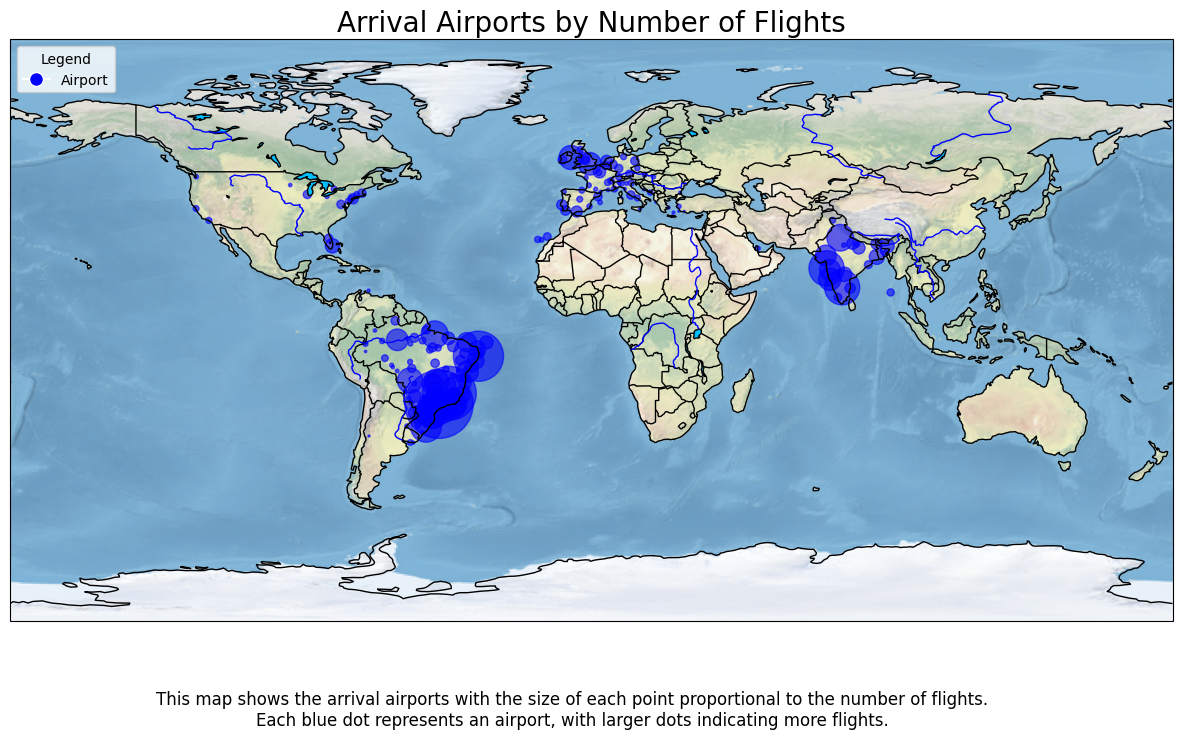

In [27]:
# create a GeoDataFrame
arrival_gdf = gpd.GeoDataFrame(arrival_flight_counts, 
                               geometry=gpd.points_from_xy(arrival_flight_counts.arrival_lon, arrival_flight_counts.arrival_lat))

# filter out empty points
arrival_gdf = arrival_gdf[~arrival_gdf.geometry.is_empty]

# create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# add water bodies and land masses
ax.stock_img()  # use standard background image
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='coral')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='skyblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='deepskyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# add airports with size proportional to the number of flights in blue
scatter = ax.scatter(arrival_gdf.geometry.x, arrival_gdf.geometry.y, s=arrival_gdf.num_flights, color='blue', transform=ccrs.PlateCarree(), alpha=0.6)

# add title and description
plt.title('Arrival Airports by Number of Flights', fontsize=20)
plt.figtext(0.5, 0.1, 'This map shows the arrival airports with the size of each point proportional to the number of flights.\n'
                      'Each blue dot represents an airport, with larger dots indicating more flights.', 
            ha='center', fontsize=12)

# add legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Airport', markerfacecolor='blue', markersize=10)]
ax.legend(handles=legend_elements, loc='upper left', title='Legend')

plt.show()

/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_33291/552954658.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='departure_airport', data=df_sorted, palette='viridis')


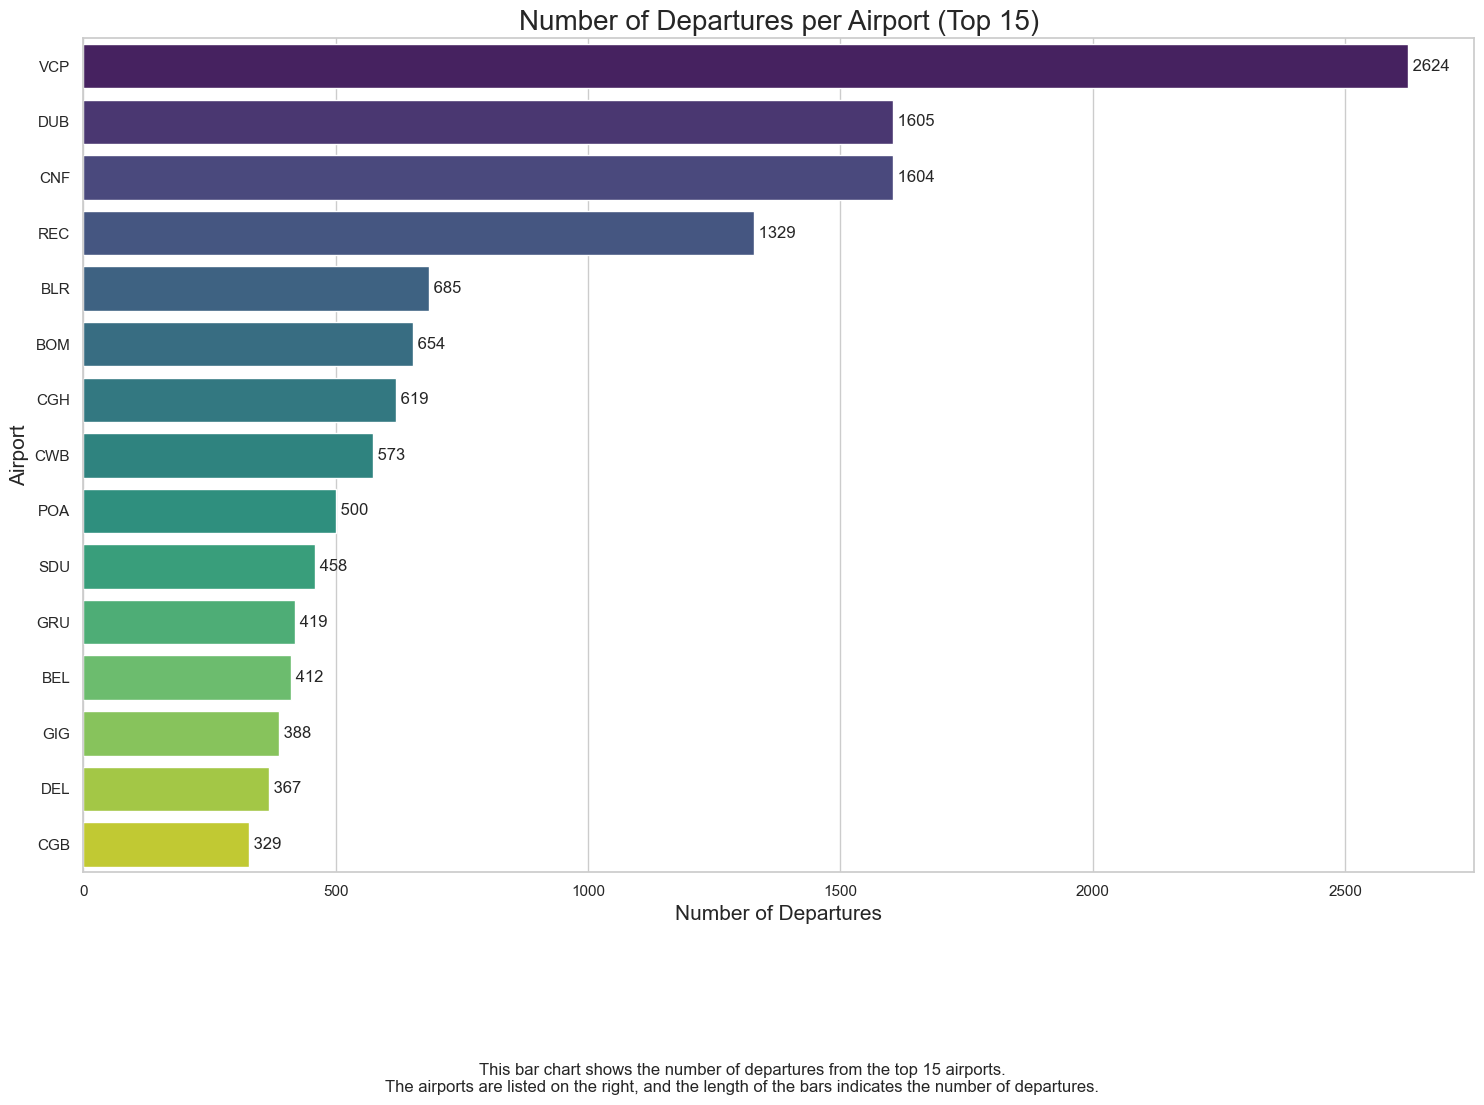

In [31]:
# assuming `data` is already loaded as a DataFrame
# count the number of flights departing from each airport
departure_flight_counts = data.groupby('departure_airport').flight_id.nunique().reset_index()
departure_flight_counts.columns = ['departure_airport', 'count']

# sort data by count and select top 15 airports
df_sorted = departure_flight_counts.sort_values(by='count', ascending=False).head(15)

# create the plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='count', y='departure_airport', data=df_sorted, palette='viridis')

# add title and labels
plt.title('Number of Departures per Airport (Top 15)', fontsize=20)
plt.xlabel('Number of Departures', fontsize=15)
plt.ylabel('Airport', fontsize=15)

# add number of departures next to the bars
for index, value in enumerate(df_sorted['count']):
    plt.text(value, index, f' {value}', va='center', fontsize=12)

# add description below the plot
plt.figtext(0.5, -0.1, 'This bar chart shows the number of departures from the top 15 airports.\n'
                       'The airports are listed on the right, and the length of the bars indicates the number of departures.', 
            ha='center', fontsize=12)

# adjust layout to make space for the description
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.show()

/var/folders/vm/vj250x0s5q9bj_4nnx_z8mcc0000gn/T/ipykernel_33291/457948482.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='count', y='route', data=top_routes, palette='viridis')


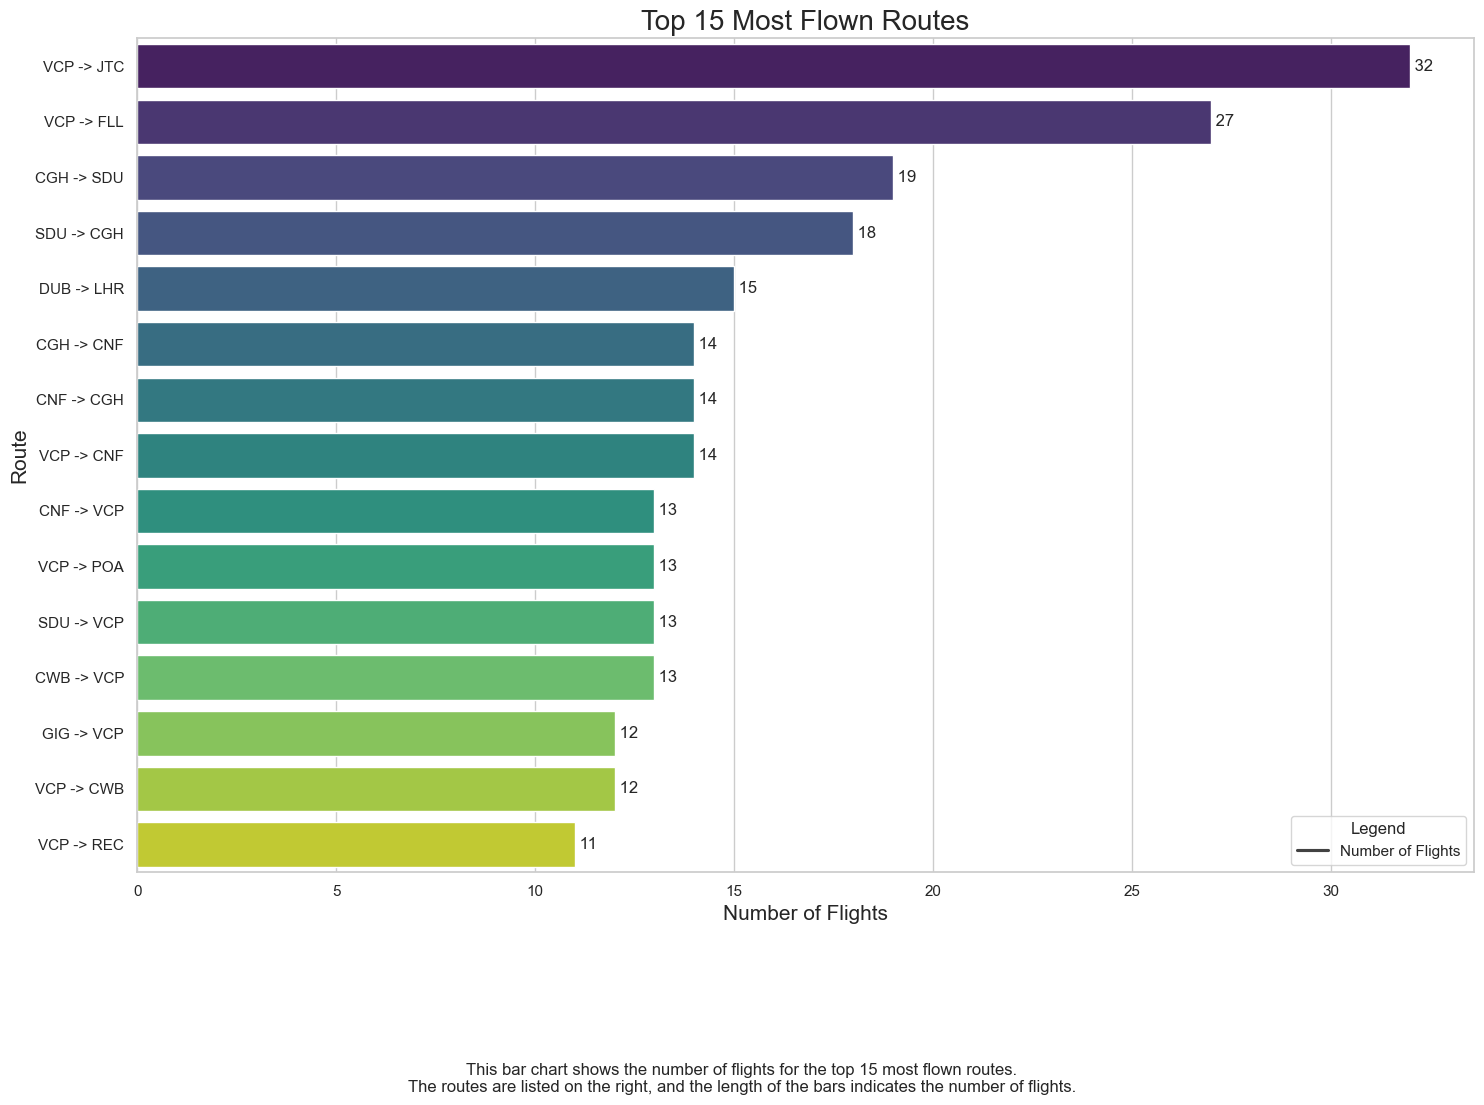

In [32]:
# create a new column for the route
data['route'] = data['departure_airport'] + ' -> ' + data['arrival_airport']

# drop duplicate flight numbers for each route
df_unique_flights = data.drop_duplicates(subset=['flight_number', 'route'])

# count the number of flights per route
route_counts = df_unique_flights['route'].value_counts().reset_index()
route_counts.columns = ['route', 'count']

# sort and select the top 15 routes
top_routes = route_counts.head(15)

# create the plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='count', y='route', data=top_routes, palette='viridis')

# add title and labels
plt.title('Top 15 Most Flown Routes', fontsize=20)
plt.xlabel('Number of Flights', fontsize=15)
plt.ylabel('Route', fontsize=15)

# add number of flights next to the bars
for index, value in enumerate(top_routes['count']):
    plt.text(value, index, f' {value}', va='center', fontsize=12)

# add description below the plot
plt.figtext(0.5, -0.1, 'This bar chart shows the number of flights for the top 15 most flown routes.\n'
                       'The routes are listed on the right, and the length of the bars indicates the number of flights.', 
            ha='center', fontsize=12)

# add legend
plt.legend(title='Legend', labels=['Number of Flights'])

# adjust layout to make space for the description
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.show()

In [33]:
# total number of unique routes
total_routes = route_counts.shape[0]

print(f"Total number of unique routes: {total_routes}")

Total number of unique routes: 704


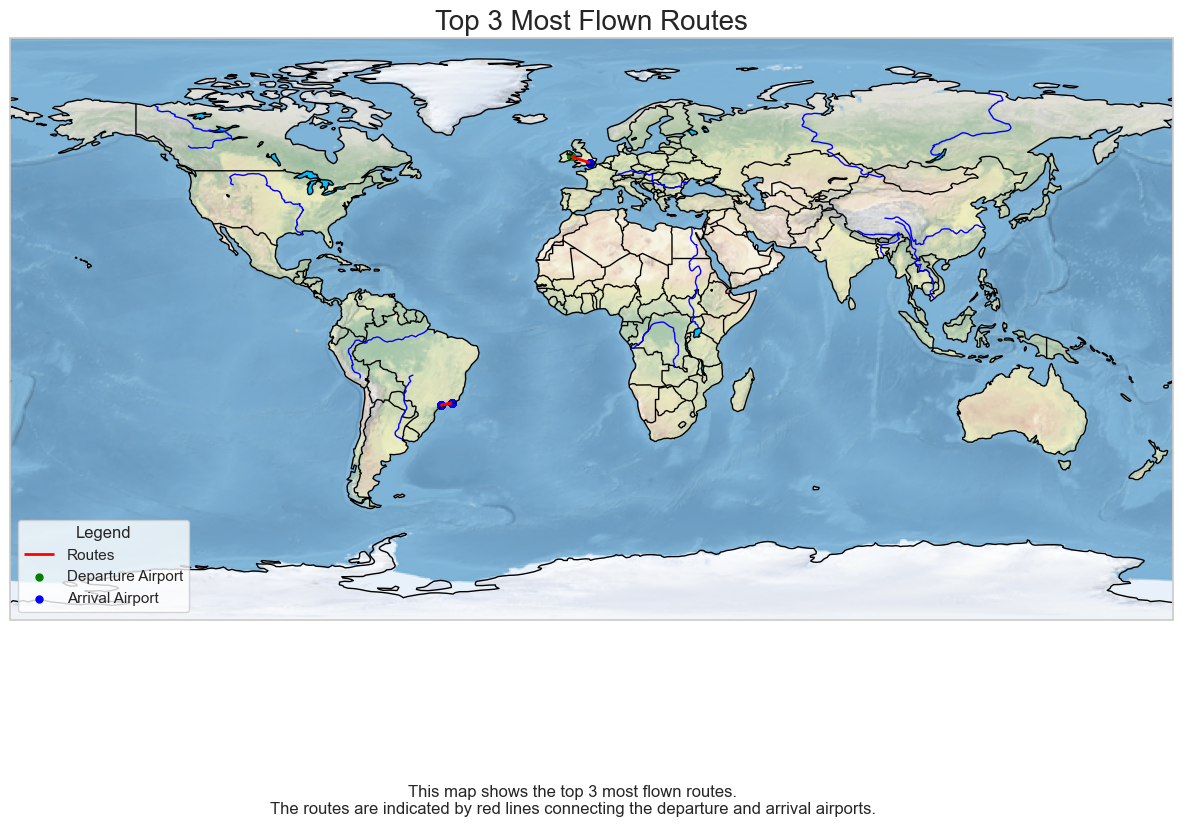

In [34]:
# Count the number of flights for each route
data['route'] = data['departure_airport'] + ' -> ' + data['arrival_airport']
route_counts = data.groupby('route').flight_id.nunique().reset_index()
route_counts.columns = ['route', 'count']

# Sort and select the top 3 routes
top_routes = route_counts.sort_values(by='count', ascending=False).head(3)

# Merge top routes with original data to get coordinates
top_routes_data = data[data['route'].isin(top_routes['route'])]

# Create GeoDataFrame for the routes
departure_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.departure_lon, top_routes_data.departure_lat))
arrival_gdf = gpd.GeoDataFrame(top_routes_data, geometry=gpd.points_from_xy(top_routes_data.arrival_lon, top_routes_data.arrival_lat))

# Create LineString geometries for each route
route_lines = []
for route in top_routes['route']:
    route_data = top_routes_data[top_routes_data['route'] == route]
    departure_coords = route_data[['departure_lon', 'departure_lat']].values[0]
    arrival_coords = route_data[['arrival_lon', 'arrival_lat']].values[0]
    line = LineString([departure_coords, arrival_coords])
    route_lines.append({'route': route, 'geometry': line})

routes_lines_gdf = gpd.GeoDataFrame(route_lines)

# Create the map
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Add water bodies and land masses
ax.stock_img()  # Use standard background image
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='coral')
ax.add_feature(cfeature.OCEAN, edgecolor='black', facecolor='skyblue')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='deepskyblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Plot the routes
routes_lines_gdf.plot(ax=ax, edgecolor='red', linewidth=2, label='Routes')

# Plot departure and arrival points
departure_gdf.plot(ax=ax, color='green', markersize=25, label='Departure Airport')
arrival_gdf.plot(ax=ax, color='blue', markersize=25, label='Arrival Airport')

# Set the map extent for a suitable region (e.g., global view)
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Add title and description
plt.title('Top 3 Most Flown Routes', fontsize=20)
plt.figtext(0.5, 0.01, 'This map shows the top 3 most flown routes.\n'
                       'The routes are indicated by red lines connecting the departure and arrival airports.', 
            ha='center', fontsize=12)

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower left', title='Legend')

plt.show()

In [35]:
top_routes

route  count
253  DUB -> LHR    248
576  SDU -> CGH    186
127  CGH -> SDU    182